In [1]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np

# Types of time series variables

In [2]:
stocks = pd.read_csv("../input/nyse/prices.csv", parse_dates=['date'])
stocks = stocks[stocks["symbol"] == "GOOG"].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [3]:
stocks.sample(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-08-12,GOOG,483.940825,492.010830,482.510831,494.750834,4425700.0
2010-10-12,GOOG,540.120896,541.390899,537.790902,545.990909,7535300.0
2011-04-15,GOOG,545.290906,530.700938,530.060912,545.750938,28192500.0
2010-06-21,GOOG,499.900872,488.560838,484.890846,500.970849,5989200.0
2014-12-03,GOOG,531.442404,531.322384,529.262414,535.998416,1277900.0


In [4]:
shelter_outcomes = pd.read_csv("../input/austin-animal-center-shelter-outcomes-and/aac_shelter_outcomes.csv", parse_dates=["datetime", "date_of_birth"])
shelter_outcomes = shelter_outcomes[["outcome_type", "age_upon_outcome", "datetime", "animal_type", "breed", 
                                    "color", "sex_upon_outcome", "date_of_birth"]]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


# Visualizing by grouping

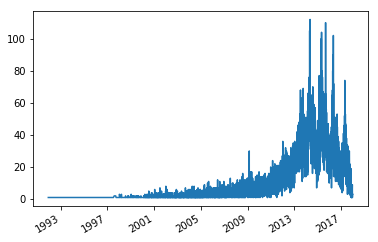

In [47]:
temp = shelter_outcomes["date_of_birth"].value_counts().sort_values()
temp.plot.line()

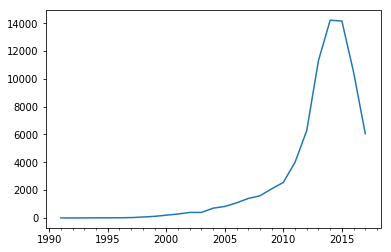

In [33]:
t1 = shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum()
# print(t1)
t1.plot.line()

date
2010-12-31    6.383553e+06
2011-12-31    6.179412e+06
2012-12-31    5.228172e+06
2013-12-31    4.190346e+06
2014-12-31    2.487038e+06
2015-12-31    2.069231e+06
2016-12-31    1.829845e+06
Freq: A-DEC, Name: volume, dtype: float64


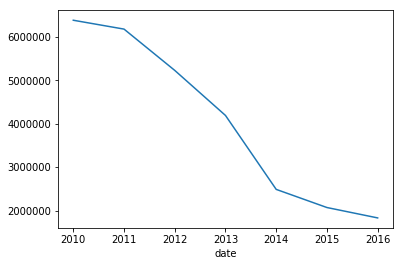

In [12]:
t2 = stocks['volume'].resample('Y').mean()
print(t2)
t2.plot.line()

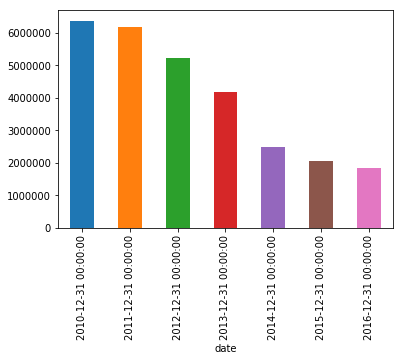

In [10]:
stocks['volume'].resample('Y').mean().plot.bar()

# Lag Plot

In [13]:
from pandas.plotting import lag_plot

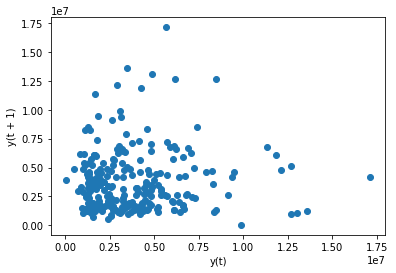

In [14]:
lag_plot(stocks['volume'].sample(250))

In [15]:
stocks.volume.shape

(1762,)

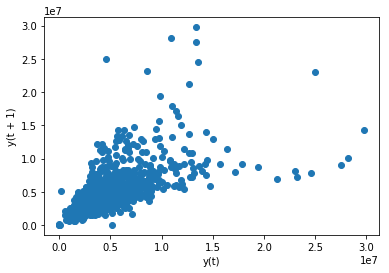

In [16]:
lag_plot(stocks['volume'])

# Autocorrelation Plot

In [17]:
from pandas.plotting import autocorrelation_plot

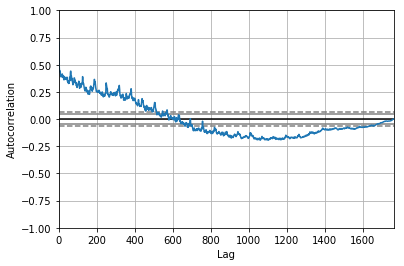

In [18]:
autocorrelation_plot(stocks['volume'])

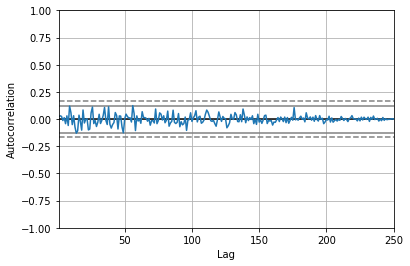

In [21]:
autocorrelation_plot(stocks['volume'].sample(250))

# Exercises

In [22]:
import pandas as pd

In [32]:
crypto = pd.read_csv("../input/all-crypto-currencies/crypto-markets.csv")
crypto = crypto[crypto['name'] == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
print crypto['date'].head()
crypto.head()

0   2013-04-28
1   2013-04-29
2   2013-04-30
3   2013-05-01
4   2013-05-02
Name: date, dtype: datetime64[ns]


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


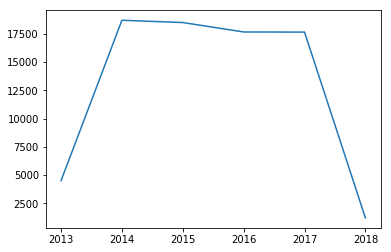

In [41]:
shelter_outcomes['datetime'].value_counts().resample('Y').sum().plot.line()

In [42]:
crypto['volume'].shape

(1793,)

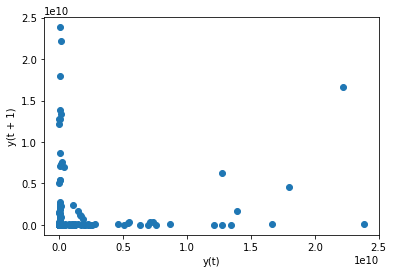

In [43]:
lag_plot(crypto['volume'].sample(250))

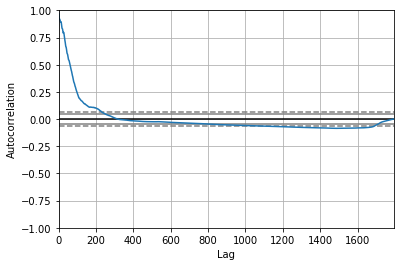

In [46]:
autocorrelation_plot(crypto['volume'])